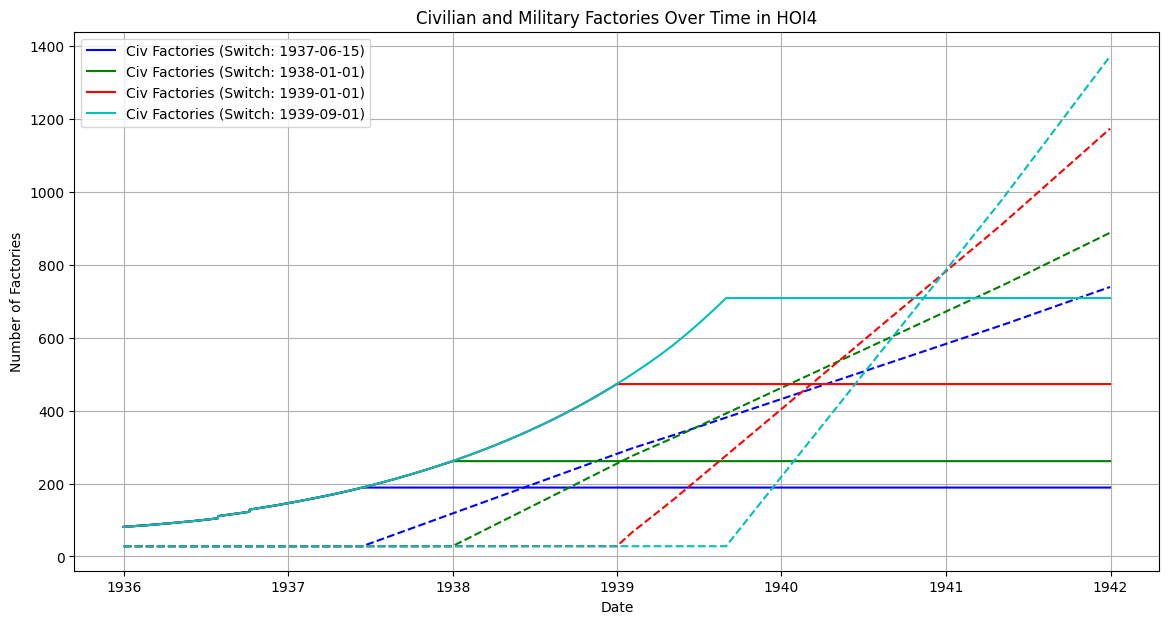

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
# from datetime import datetime, timedelta
import datetime

# Constants
CIV_AMOUNT = 81
MIL_AMOUNT = 28
INFRA = {"4": 10}
STATES = [
	{"INFRA": 4, "MAX": 12, "MIL": 5, "CIV": 4, "NAV": 0},
	{"INFRA": 4, "MAX": 10, "MIL": 2, "CIV": 6, "NAV": 0},
	{"INFRA": 4, "MAX": 8, "MIL": 1, "CIV": 2, "NAV": 0},
	{"INFRA": 4, "MAX": 12, "MIL": 3, "CIV": 4, "NAV": 0},
	{"INFRA": 4, "MAX": 10, "MIL": 0, "CIV": 3, "NAV": 0},
]

Germany = {
	"States": [
		{"INFRA": 4, "MAX": 12, "MIL": 5, "CIV": 4, "NAV": 0},
		{"INFRA": 4, "MAX": 10, "MIL": 2, "CIV": 6, "NAV": 0},
		{"INFRA": 4, "MAX": 8, "MIL": 1, "CIV": 2, "NAV": 0},
		{"INFRA": 4, "MAX": 12, "MIL": 3, "CIV": 4, "NAV": 0},
		{"INFRA": 4, "MAX": 10, "MIL": 0, "CIV": 3, "NAV": 0},
	],
	"Initial": {
		"Civs": 35,
		"Mils": 28,
		"Navs": 0
	},
	"Events": [
	 	{
			"date": datetime.datetime(1936, 1, 1) + datetime.timedelta(70), # Four Year Plan
			"civ_bonus": 0.1,
			"mil_bonus": 0.1
  		},
		{
			"date": datetime.datetime(1936, 1, 1) + datetime.timedelta(70+70), # Autarky
			"civ_bonus": 0.1,
			"mil_bonus": 0.1
		},
		{
			"date": datetime.datetime(1936, 1, 1) + datetime.timedelta(140 + 70), # Herman Göring-Werke
			"civs": 6
		},
		{
			"date": datetime.datetime(1936, 1, 1) + datetime.timedelta(140 + 70 + 70), # KdF-Wagen
			"civs": 6
		},
		{
			"date": datetime.datetime(1939, 2, 1), # WW2 Start, MEFO Bills end
			"mil_bonus": -0.25
		},
		{
			"date": datetime.datetime(1936, 1, 1) + datetime.timedelta(0), # 
			"civs": 6
		},
		{
			"date": datetime.datetime(1936, 1, 1) + datetime.timedelta(0), # 
			"civs": 6
		}
	]
}


START_DATE = datetime.datetime(1936, 1, 1)
END_DATE = datetime.datetime(1942, 1, 1)
CIV_COST = 10800
MIL_COST = 7200
CIV_OUTPUT = 5
CIV_BONUS = 0.25
MIL_BONUS = 0.4
CONV_CIV_TO_MIL_COST_BONUS = -0.2 # -20%
CONV_MIL_TO_CIV_COST_BONUS = -0.2 # -20%
CONV_CIV_COST = 7200
CONV_MIL_COST = 3200
TRADE_BONUS = 0.1
INFRA_COST = 6000
INFRA = {
	"1": 1.2,
	"2": 1.4,
	"3": 1.6,
	"4": 1.8,
	"5": 2
}

# A batch is 15 civ. (75 * bonus) * Infra

# Function to compute factory counts over time
def simulate_factory_counts(switch_date, convert):
	civs = CIV_AMOUNT
	mils = MIL_AMOUNT
	cur_date = START_DATE
	civ_bonus = CIV_BONUS
	mil_bonus = MIL_BONUS
	conv_civ_to_mil_bonus = CONV_CIV_TO_MIL_COST_BONUS
	conv_mil_to_civ_bonus = CONV_MIL_TO_CIV_COST_BONUS
	trade_bonus = TRADE_BONUS
	dates = []
	civ_counts = []
	mil_counts = []
	
	while cur_date < END_DATE:
		days_since_start = (cur_date - START_DATE).days
		
		# Apply bonuses and add factories at specific days
		if days_since_start == 70: # Four Year Plan
			civ_bonus += 0.1
			mil_bonus += 0.1
		elif days_since_start == 70+70: # Autarky
			civ_bonus += 0.1
			mil_bonus += 0.1
		elif days_since_start == 140 + 70: # Herman Göring-Werke
			civs += 6
		elif days_since_start == 140 + 70 + 70: # KdF-Wagen
			civs += 6
		elif cur_date == datetime.datetime(1939, 2, 1): # WW2 Start, MEFO Bills end
			mil_bonus -= 0.25
   
		elif cur_date == datetime.datetime(1936, 2, 1): # Temp Pol Adv
			civ_bonus += 0.1
		elif cur_date == datetime.datetime(1936, 6, 17): # Temp Free Trade
			civ_bonus += 0.1
		elif cur_date == datetime.datetime(1936, 7, 13): # Construction 1
			civ_bonus += 0.1
		elif cur_date == datetime.datetime(1936, 7, 13) + datetime.timedelta(142): # Construction 2
			civ_bonus += 0.1
   
		elif cur_date == datetime.datetime(1937, 1, 1): # War Economy
			mil_bonus += 0.2
			conv_civ_to_mil_bonus = 0.2
			

		# elif days_since_start == 70+70+70:
		# 	civs += 6
		# elif days_since_start == 70+70+70+70:
		# 	civs += 6
		# elif days_since_start == 70+70+70+70+70+70:
		# 	civs += 10
		# 	mils += 3
		# elif days_since_start == 104:
		# 	civ_bonus += 0.1
		# elif days_since_start == 104+104:
		# 	mil_bonus += 0.1
		# elif days_since_start == 104+104+104:
		# 	mil_bonus += 0.1
		# elif days_since_start == 104+104+208:
		# 	mil_bonus += 0.2
   
		elif cur_date == datetime.datetime(1937, 5, 1):
			civ_bonus += 0.1
			mil_bonus += 0.1
		elif cur_date == datetime.datetime(1939, 5, 1):
			civ_bonus += 0.1
			mil_bonus += 0.1
		elif cur_date == datetime.datetime(1941, 5, 1):
			civ_bonus += 0.1
			mil_bonus += 0.1
			
		# Calculate daily production rates
		if cur_date < switch_date:
			# Building civ factories
			daily_civ_production = civs * CIV_OUTPUT * (1 + civ_bonus) * INFRA["4"]  / CIV_COST
			civs += daily_civ_production
		# elif cur_date < switch_date + datetime.timedelta(182):
		# 	daily_mil_production = civs * CIV_OUTPUT * (1 + conv_civ_to_mil_bonus) * INFRA["4"] / CONV_MIL_COST # Conv Only
		# 	mils += daily_mil_production
		# 	civs -= daily_mil_production # Conv Only
		else:
			# Building mil factories
			daily_mil_production = civs * CIV_OUTPUT * (1 + mil_bonus) * INFRA["4"] / MIL_COST
			# daily_mil_production = civs * CIV_OUTPUT * (1 + conv_civ_to_mil_bonus) * INFRA["4"] / CONV_MIL_COST # Conv Only
			mils += daily_mil_production
			# civs -= daily_mil_production # Conv Only
		
		# Store the results
		dates.append(cur_date)
		civ_counts.append(civs)
		mil_counts.append(mils)
		
		# Move to the next day
		cur_date += datetime.timedelta(days=1)
	
	return dates, civ_counts, mil_counts

# Generate the data for plotting
switch_dates = [
	# { "date": datetime.datetime(1936, 6, 1) },
	# { "date": datetime.datetime(1937, 1, 1) },
	{ "date": datetime.datetime(1937, 6, 15) },
	{ "date": datetime.datetime(1938, 1, 1), "convert": True },
	{ "date": datetime.datetime(1939, 1, 1) },
	{ "date": datetime.datetime(1939, 9, 1) }, # IRL WW2
]

plt.figure(figsize=(14, 7))

# Define a list of colors to use for each switch date
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # You can add more colors if needed

# Plot for each switch date
for i, switch_date in enumerate(switch_dates):
    dates, civ_counts, mil_counts = simulate_factory_counts(switch_date["date"], switch_date.get("convert", False))
    color = colors[i % len(colors)]  # Cycle through the colors list
    plt.plot(dates, civ_counts, label=f'Civ Factories (Switch: {switch_date["date"].date()})', color=color)
    plt.plot(dates, mil_counts, linestyle='--', color=color)
    # plt.axvline(x=switch_date.date(), color='gray', linestyle='--')


# Plot customization
plt.xlabel('Date')
plt.ylabel('Number of Factories')
plt.title('Civilian and Military Factories Over Time in HOI4')
plt.legend()
plt.grid(True)
plt.show()
